**GODFATHER NETWORK**

In [1]:
import pandas as pd
import re
from collections import defaultdict
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
f = open('godfather_script.txt')

In [8]:
with open('godfather_script.txt') as fh:
    script = fh.read()

In [12]:
script[300:600]

'W, AMERIGO BONASERA, a\n\tman of sixty, dressed in a black suit, on the verge of great\n\temotion.\n\n\t\t\t\tBONASERA\n\t\tAmerica has made my fortune.\n\n\tAs he speaks, THE VIEW imperceptibly begins to loosen.\n\n\t\t\t\tBONASERA\n\t\tI raised my daughter in the American\n\t\tfashion; I gave her freedom, but\n\t\ttaught her ne'

In [21]:
scenes = re.split('INT |EXT ', script) #Scene headings
scenes = scenes[1:]

In [20]:
scenes[4]

"DAY: MALL (SUMMER 1945)\n\n\tWHAT HE SEES:\n\n\tNIPPI waits nervously by the barrel.\n\n\t\t\t\tHAGEN (O.S.)\n\t\tHis father worked with you in the\n\t\tfreight yards when you were young.\n\n\tLUCA BRASI sitting alone, grotesque and quiet.\n\n\t\t\t\tHAGEN (O.S.)\n\t\tHe's not on the list, but Luca\n\t\tBrasi wants to see you.\n\n\t"

In [7]:
scene_chars = defaultdict(list)

In [8]:
i = 1

for scene in scenes:
    scene_characters = []
    lines = re.split('\t\t', scene)
    for line in lines:
        if line:
            characters = re.findall('^[A-Z]+\s*[A-Z]*\n+', line)
            for character in characters:
                if character:
                    scene_characters.append(character.strip())
    scene_characters = set(scene_characters)
    key = 'scene' + str(i)
    if len(scene_characters) > 0:
        scene_chars[key] = list(scene_characters)
        i += 1

In [9]:
scene_chars

defaultdict(list,
            {'scene1': ['BONASERA', 'DON CORLEONE'],
             'scene2': ['SONNY', 'SANDRA', 'DON CORLEONE'],
             'scene3': ['SONNY', 'CLEMENZA', 'PAULIE'],
             'scene4': ['HAGEN', 'NAZORINE', 'DON CORLEONE'],
             'scene5': ['HAGEN', 'DON CORLEONE'],
             'scene6': ['KAY', 'MICHAEL'],
             'scene7': ['WOMAN', 'CARLO', 'PAULIE'],
             'scene8': ['HAGEN', 'KAY', 'MICHAEL'],
             'scene9': ['HAGEN', 'LUCA', 'DON CORLEONE'],
             'scene10': ['JOHNNY', 'KAY', 'MICHAEL', 'DON CORLEONE'],
             'scene11': ['HAGEN'],
             'scene12': ['LUCY'],
             'scene13': ['HAGEN'],
             'scene14': ['JOHNNY', 'HAGEN', 'SONNY', 'DON CORLEONE'],
             'scene15': ['MICHAEL', 'DON CORLEONE'],
             'scene16': ['MICHAEL', 'DON CORLEONE'],
             'scene17': ['GENCO', 'DON CORLEONE'],
             'scene18': ['DON CORLEONE'],
             'scene19': ['SONNY'],
             'sce

In [10]:
all_characters = {}
for scene in scene_chars:
    for char in scene_chars[scene]:
        all_characters[char] = defaultdict(int)

In [11]:
all_characters

{'BONASERA': defaultdict(int, {}),
 'DON CORLEONE': defaultdict(int, {}),
 'SONNY': defaultdict(int, {}),
 'SANDRA': defaultdict(int, {}),
 'CLEMENZA': defaultdict(int, {}),
 'PAULIE': defaultdict(int, {}),
 'HAGEN': defaultdict(int, {}),
 'NAZORINE': defaultdict(int, {}),
 'KAY': defaultdict(int, {}),
 'MICHAEL': defaultdict(int, {}),
 'WOMAN': defaultdict(int, {}),
 'CARLO': defaultdict(int, {}),
 'LUCA': defaultdict(int, {}),
 'JOHNNY': defaultdict(int, {}),
 'LUCY': defaultdict(int, {}),
 'GENCO': defaultdict(int, {}),
 'WOLTZ': defaultdict(int, {}),
 'SOLLOZZO': defaultdict(int, {}),
 'FREDO': defaultdict(int, {}),
 'OFFICE MANAGER': defaultdict(int, {}),
 'MAN': defaultdict(int, {}),
 'MAMA': defaultdict(int, {}),
 'BRUNO': defaultdict(int, {}),
 'LAMPONE': defaultdict(int, {}),
 'NURSE': defaultdict(int, {}),
 'ENZO': defaultdict(int, {}),
 'A DETECTIVE': defaultdict(int, {}),
 'MCCLUSKEY': defaultdict(int, {}),
 'COP': defaultdict(int, {}),
 'TESSIO': defaultdict(int, {}),
 'DR

In [12]:
for scene in scene_chars:
    for char in scene_chars[scene]:
        print('Scene =', scene)
        print('Char =', char)
        temp_list = scene_chars[scene][:]
        print('Temp list = ', temp_list)
        temp_list.remove(char)
        print('Temp list after removal', temp_list)
        for partner in temp_list:
            all_characters[char][partner] += 1
            

Scene = scene1
Char = BONASERA
Temp list =  ['BONASERA', 'DON CORLEONE']
Temp list after removal ['DON CORLEONE']
Scene = scene1
Char = DON CORLEONE
Temp list =  ['BONASERA', 'DON CORLEONE']
Temp list after removal ['BONASERA']
Scene = scene2
Char = SONNY
Temp list =  ['SONNY', 'SANDRA', 'DON CORLEONE']
Temp list after removal ['SANDRA', 'DON CORLEONE']
Scene = scene2
Char = SANDRA
Temp list =  ['SONNY', 'SANDRA', 'DON CORLEONE']
Temp list after removal ['SONNY', 'DON CORLEONE']
Scene = scene2
Char = DON CORLEONE
Temp list =  ['SONNY', 'SANDRA', 'DON CORLEONE']
Temp list after removal ['SONNY', 'SANDRA']
Scene = scene3
Char = SONNY
Temp list =  ['SONNY', 'CLEMENZA', 'PAULIE']
Temp list after removal ['CLEMENZA', 'PAULIE']
Scene = scene3
Char = CLEMENZA
Temp list =  ['SONNY', 'CLEMENZA', 'PAULIE']
Temp list after removal ['SONNY', 'PAULIE']
Scene = scene3
Char = PAULIE
Temp list =  ['SONNY', 'CLEMENZA', 'PAULIE']
Temp list after removal ['SONNY', 'CLEMENZA']
Scene = scene4
Char = HAGEN


Scene = scene71
Char = MAMA
Temp list =  ['HAGEN', 'KAY', 'MAMA']
Temp list after removal ['HAGEN', 'KAY']
Scene = scene72
Char = CONNIE
Temp list =  ['CONNIE', 'CARLO']
Temp list after removal ['CARLO']
Scene = scene72
Char = CARLO
Temp list =  ['CONNIE', 'CARLO']
Temp list after removal ['CONNIE']
Scene = scene73
Char = SONNY
Temp list =  ['SONNY', 'HAGEN', 'FREDO']
Temp list after removal ['HAGEN', 'FREDO']
Scene = scene73
Char = HAGEN
Temp list =  ['SONNY', 'HAGEN', 'FREDO']
Temp list after removal ['SONNY', 'FREDO']
Scene = scene73
Char = FREDO
Temp list =  ['SONNY', 'HAGEN', 'FREDO']
Temp list after removal ['SONNY', 'HAGEN']
Scene = scene74
Char = CONNIE
Temp list =  ['CONNIE', 'CARLO']
Temp list after removal ['CARLO']
Scene = scene74
Char = CARLO
Temp list =  ['CONNIE', 'CARLO']
Temp list after removal ['CONNIE']
Scene = scene75
Char = CONNIE
Temp list =  ['CONNIE', 'CARLO']
Temp list after removal ['CARLO']
Scene = scene75
Char = CARLO
Temp list =  ['CONNIE', 'CARLO']
Temp li

In [14]:
G = nx.Graph()
for character in all_characters:
    for partner in all_characters[character]:
        G.add_edge(character, partner, weight = all_characters[character][partner])

In [15]:
G.nodes()

NodeView(('BONASERA', 'DON CORLEONE', 'SONNY', 'SANDRA', 'HAGEN', 'NAZORINE', 'LUCA', 'JOHNNY', 'KAY', 'MICHAEL', 'GENCO', 'SOLLOZZO', 'FREDO', 'OFFICE MANAGER', 'TATTAGLIA', 'DON ZALUCHI', 'BARZINI', 'CLEMENZA', 'CARLO', 'TESSIO', 'PAULIE', 'MAMA', 'BRUNO', 'DRIVER', 'CONNIE', 'LAMPONE', 'WOMAN', 'WOLTZ', 'BUTTON MAN', 'NURSE', 'ENZO', 'A DETECTIVE', 'MCCLUSKEY', 'COP', 'DON TOMMASSINO', 'FABRIZZIO', 'CALO', 'VITELLI', 'APPOLONIA', 'MOE', 'GIRL', 'PRIEST', 'NERI', 'MAN'))

In [22]:
len(G.nodes())

44

In [16]:
G.edges()

EdgeView([('BONASERA', 'DON CORLEONE'), ('DON CORLEONE', 'SONNY'), ('DON CORLEONE', 'SANDRA'), ('DON CORLEONE', 'HAGEN'), ('DON CORLEONE', 'NAZORINE'), ('DON CORLEONE', 'LUCA'), ('DON CORLEONE', 'JOHNNY'), ('DON CORLEONE', 'KAY'), ('DON CORLEONE', 'MICHAEL'), ('DON CORLEONE', 'GENCO'), ('DON CORLEONE', 'SOLLOZZO'), ('DON CORLEONE', 'FREDO'), ('DON CORLEONE', 'OFFICE MANAGER'), ('DON CORLEONE', 'TATTAGLIA'), ('DON CORLEONE', 'DON ZALUCHI'), ('DON CORLEONE', 'BARZINI'), ('DON CORLEONE', 'CLEMENZA'), ('DON CORLEONE', 'CARLO'), ('DON CORLEONE', 'TESSIO'), ('SONNY', 'SANDRA'), ('SONNY', 'CLEMENZA'), ('SONNY', 'PAULIE'), ('SONNY', 'JOHNNY'), ('SONNY', 'HAGEN'), ('SONNY', 'SOLLOZZO'), ('SONNY', 'MAMA'), ('SONNY', 'MICHAEL'), ('SONNY', 'BRUNO'), ('SONNY', 'TESSIO'), ('SONNY', 'DRIVER'), ('SONNY', 'CONNIE'), ('SONNY', 'FREDO'), ('SANDRA', 'CLEMENZA'), ('HAGEN', 'CLEMENZA'), ('HAGEN', 'PAULIE'), ('HAGEN', 'NAZORINE'), ('HAGEN', 'KAY'), ('HAGEN', 'MICHAEL'), ('HAGEN', 'LUCA'), ('HAGEN', 'JOHNNY')

In [23]:
len(G.edges())

109

In [17]:
d = nx.degree(G)
dic = dict(d)

In [41]:
weights = [(G[u][v]['weight'])/3 if (G[u][v]['weight']) != 1 else 1 for u,v in G.edges()]

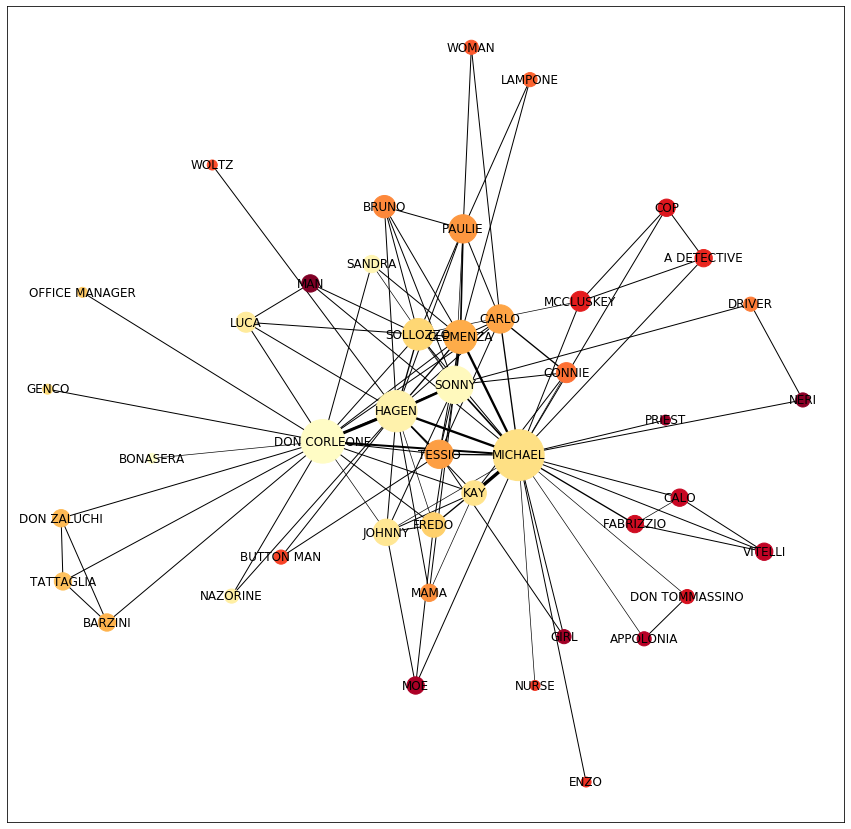

In [43]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, with_labels = True, node_color = range(44), width = weights , cmap = plt.cm.get_cmap('YlOrRd'), node_size=[v * 100 for v in dic.values()], alpha = 1)
plt.show()

In [19]:
centralities = nx.betweenness_centrality(G)

In [20]:
sorted([(elem[0], elem[1]) for elem in list(centralities.items())], key = lambda x: x[1], reverse = True )

[('MICHAEL', 0.5222140324299791),
 ('DON CORLEONE', 0.3031817942116945),
 ('HAGEN', 0.14412556189964829),
 ('SONNY', 0.0889399852024437),
 ('CLEMENZA', 0.05787059009650369),
 ('CARLO', 0.04317187058050847),
 ('SOLLOZZO', 0.04100273419210297),
 ('TESSIO', 0.027836224929248185),
 ('PAULIE', 0.020691609977324263),
 ('KAY', 0.012245856764129181),
 ('NERI', 0.007771713336497389),
 ('JOHNNY', 0.007319077501801752),
 ('FREDO', 0.0060073124857178),
 ('LUCA', 0.004311026736275906),
 ('MAN', 0.0036351891003053795),
 ('MCCLUSKEY', 0.0023624953857511997),
 ('DRIVER', 0.0015134736064968623),
 ('CONNIE', 0.0011377419184728152),
 ('MAMA', 0.0003427727680219375),
 ('BONASERA', 0.0),
 ('SANDRA', 0.0),
 ('NAZORINE', 0.0),
 ('GENCO', 0.0),
 ('OFFICE MANAGER', 0.0),
 ('TATTAGLIA', 0.0),
 ('DON ZALUCHI', 0.0),
 ('BARZINI', 0.0),
 ('BRUNO', 0.0),
 ('LAMPONE', 0.0),
 ('WOMAN', 0.0),
 ('WOLTZ', 0.0),
 ('BUTTON MAN', 0.0),
 ('NURSE', 0.0),
 ('ENZO', 0.0),
 ('A DETECTIVE', 0.0),
 ('COP', 0.0),
 ('DON TOMMASSINO

In [47]:
pos = nx.nx_agraph.graphviz_layout(G)

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')